In [499]:
##most flexible package is pillow for images
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

In [500]:
img_path='/home/my/Desktop/resume/percep/model1.jpg'
mask_path='/home/my/Desktop/resume/percep/Mask_front.png'

In [501]:
img = Image.open(img_path)
print img

img2 = img.resize((512, 512))

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1200x1200 at 0x7F6B0FDBE3D0>


(512, 512, 3)


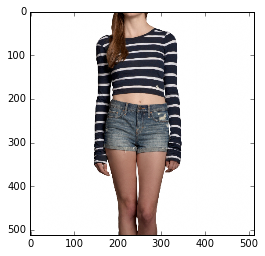

In [502]:
img = np.array(img2)
print img.shape
plt.imshow(img)
plt.show()

In [503]:
mask = Image.open(mask_path)

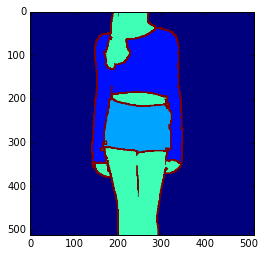

In [504]:

plt.imshow(mask)
plt.show()

In [505]:

mask1 = np.array(mask)##reshape
print np.unique(mask, return_counts=True)
print mask1

(array([0, 1, 2, 3, 5, 7], dtype=uint8), array([178594,  27466,  14228,  30728,      6,  11122]))
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [506]:
mask1=np.reshape(mask1,(512,512,1))

[0 0 0]


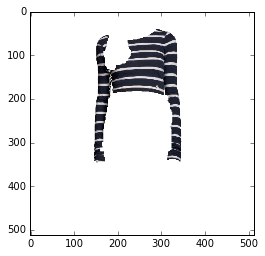

<type 'numpy.ndarray'>


In [507]:
val=img*(mask1==1)
print val[0][0]
val[np.where((val == [0,0,0]).all(axis = 2))] = [255,255,255]
plt.imshow(val)
val2=val
plt.show()
print type(val)

(512, 512)
[0 1 2 3 5]


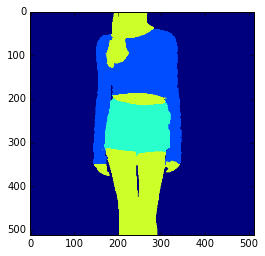

In [508]:
mask2_path='/home/my/Desktop/resume/percep/m1.png'
img=Image.open(mask2_path)
print np.array(img).shape
img2=img.resize((512,512))
img2=np.array(img2)
print np.unique(img2)
plt.imshow(img2)
plt.show()

In [509]:
import cv2 as cv
kernel = np.ones((5,5),np.uint8)
dilation = cv.dilate(img2,kernel,iterations = 2)

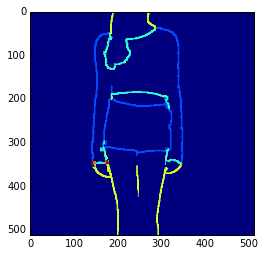

[0 1 2 3 4 5]


In [510]:
new_img=dilation-img2
plt.imshow(new_img)
plt.show()
print np.unique(new_img)

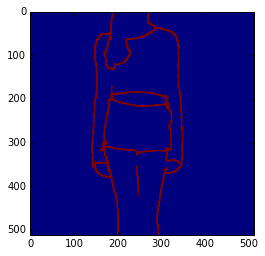

[0 7]


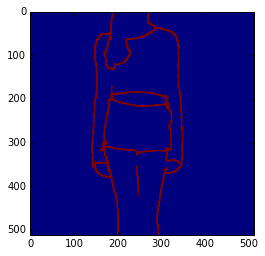

In [511]:
temp = np.array(new_img>0)
plt.imshow(temp)
plt.show()
bkgc_class_value = 7
new_img2 = temp*bkgc_class_value
print np.unique(new_img2)
plt.imshow(new_img2)
plt.show()

[ 0  1  2  3  5  7  8  9 10]


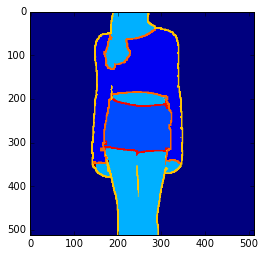

In [513]:
#print erosion[0][0]
#eroded=cv.erode(img2,kernel,iterations = 1)
new_img=new_img2+img2
print np.unique(new_img)
plt.imshow(new_img)
plt.show()

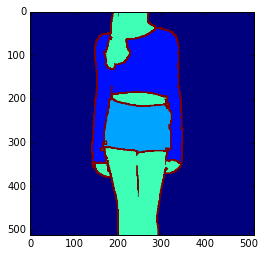

In [514]:
temp = np.array(new_img>=7)

v2=np.array(new_img<7)*img2
new_img2=temp*7
im=v2+new_img2

plt.imshow(im)
plt.show()